In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class LinearRegression(object):
    def __init__(self, learning_rate, iterations):
        data = np.genfromtxt('../data/data.csv', delimiter=',', skip_header=1)
        self.price = data[:, 1]
        self.kms = data[:, 0]
        
        self.mean_kms = np.mean(self.kms)
        self.std_kms = np.std(self.kms)
        self.norm_kms = (self.kms - self.mean_kms)/self.std_kms
        
        self.mean_price = np.mean(self.price)
        self.std_price = np.std(self.price)
        self.norm_price = (self.price - self.mean_price)/self.std_price

        self.theta0 = 0
        self.theta1 = 0

        self.learning_rate = learning_rate
        self.iterations = iterations

    def estimatePrice(self, theta0, theta1, mileage):
        return theta0 + theta1 * mileage

    def vec_estimatePrice(self, theta0, theta1):
        return np.vectorize(lambda x : self.estimatePrice(theta0, theta1, x))

    def new_thetas(self, theta0, theta1, kms):
        vfunc = self.vec_estimatePrice(theta0, theta1)
        theta0_grad = 2 * np.mean(vfunc(kms) - self.norm_price)
        theta1_grad = 2  * np.mean((vfunc(kms) - self.norm_price) * kms)
        theta0 = theta0 - theta0_grad * self.learning_rate
        theta1 = theta1 - theta1_grad * self.learning_rate
        return theta0, theta1

    def train(self, verbose=True):
        all_theta0 = np.empty((0,1))
        all_theta1 = np.empty((0,1))
        for i in range(self.iterations):
            self.theta0, self.theta1 = self.new_thetas(self.theta0, self.theta1, self.norm_kms)
            all_theta0 = np.append(all_theta0, np.array([[self.theta0]]), axis = 0)
            all_theta1 = np.append(all_theta1, np.array([[self.theta1]]), axis = 0)

        self.all_theta0 = self.std_price * all_theta0 - all_theta1 * self.mean_kms * (self.std_price / self.std_kms) + self.mean_price
        self.all_theta1 = all_theta1* (self.std_price / self.std_kms)
        np.savetxt('../output/thetas.txt', [self.all_theta0[-1], self.all_theta1[-1]], delimiter=',')
        
        if verbose == True:
            print("The thetas have been uploaded into ../output/thetas.txt")

    def plot_loss(self):
        self.train(verbose=False)
        predictions = self.all_theta0 + self.all_theta1 * self.kms
        loss = np.average(np.square(predictions - self.price), axis=1)
        plt.plot(loss)
        plt.show()
        
        return loss

    #def plot_linear(self):
    #    self.train(verbose=False)
    #    theta0, theta1 = self.all_theta0[-1], self.all_theta1[-1]
        


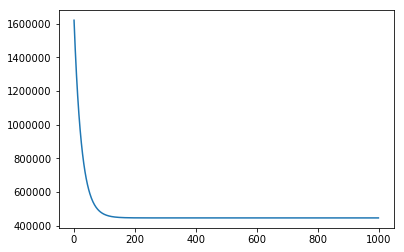

array([ 1620483.33512704,  1573959.74676084,  1529278.49249393,
        1486366.61589599,  1445154.04961133,  1405573.50095155,
        1367560.34201869,  1331052.50417957,  1295990.37671888,
        1262316.70950564,  1229976.51951404,  1198917.0010461 ,
        1169087.4395095 ,  1140439.12860975,  1112925.29082162,
        1086501.00100991,  1061123.11307474,  1036750.1895018 ,
        1013342.43370235,   990861.62503256,   969271.05638609,
         948535.47425803,   928621.02118223,   909495.18044824,
         891126.72300731,   873485.65648104,   856543.17618922,
         840271.61811695,   824644.41374434,   809636.04666488,
         795222.01092178,   781378.7709941 ,   768083.72336755,
         755315.15962702,   743052.23101061,   731274.91436742,
         719963.97946329,   709100.95758136,   698668.11136596,
         688648.40586069,   679025.48069343,   669783.6233628 ,
         660907.74358245,   652383.34864141,   644196.51974003,
         636333.88926315,   628782.61895

In [6]:
LinearRegression(0.01, 1000).plot_loss()

In [7]:
theta0, theta1 = np.genfromtxt('../output/thetas.txt', delimiter=',')

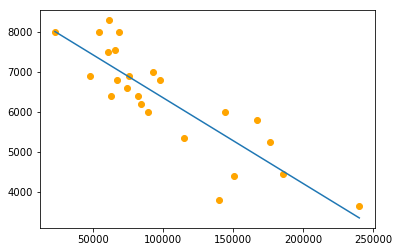

In [9]:
data = np.genfromtxt('../data/data.csv', delimiter=',', skip_header=1)
price = data[:, 1]
kms = data[:, 0]
lim_low = np.min(kms)
lim_high = np.max(kms)

plt.scatter(kms, price, c="orange")
x = np.linspace(lim_low, lim_high, 1000)
plt.plot(x, theta0 + theta1 * x)